In [20]:
#Importing packages and importing data

import pandas as pd
import numpy as np
import plotly.express as px

data=pd.read_csv('Cuisine_Ratings.csv')

data

ModuleNotFoundError: No module named 'pandas'

In [18]:
#Removing unwanted blank columns


data=data.iloc[:,0:15]

data

NameError: name 'data' is not defined

In [ ]:
#viewing top rows data

data.head()

In [ ]:
#how many rows and columns in the data

data.shape

In [ ]:
#calculating Nulls/NA values in the data

data.isnull().sum()

In [7]:
#removing nulls values

data=data.dropna()

data.isnull().sum()

NameError: name 'data' is not defined

In [ ]:
#viewing data types in columns

data.info()

In [10]:
#identyfying unique values in columns

data['Food Rating'].unique()

NameError: name 'data' is not defined

In [12]:
#replacing unique values in column and remmaping dictionary

rating_mapping={'one':'1','two':'2'}

data['Food Rating']=data['Food Rating'].replace(rating_mapping)

NameError: name 'data' is not defined

In [14]:
data['Food Rating'].unique()

NameError: name 'data' is not defined

In [ ]:
#changing data type of column 'Food Rating' for our convenience

data['Food Rating'] = pd.to_numeric(data['Food Rating'])

data.info()

In [13]:
data['Location'].unique()

NameError: name 'data' is not defined

In [ ]:
#remmaping 'Location' column
mapping={'Central Park,ny':'Central Park,NY','Market City, MY':'Market City, NY'}


data['Location']=data['Location'].replace(mapping)

In [ ]:
#viewing columns and observing data if their is any corrections to make in columns names

data.columns

In [17]:
#trim leading and tailing spacec from column headers 


data.columns= data.columns.str.strip()

data.columns

NameError: name 'data' is not defined

In [19]:
# calculating and adding 'Age' column in data as per requirement

current_year = 2024

data['Age']=current_year - data['YOB']

data

NameError: name 'data' is not defined

In [21]:
#1.Premium restrarant:

 #Which cuisine and location combination is likely to ensure a restaurant maximizes the total revenue for itself
#(i.e. most people paying highest budget)?



#data filter highest budget (assuming budget 1 to 5)

high_budget= data[data['Budget']==5]

NameError: name 'data' is not defined

In [23]:
#group by cuisine,location and summarising

premium_combination = high_budget.groupby(['Cuisines','Location']).size().reset_index(name='count')


#sort by count to find the most popular combination

premium_combination =premium_combination.sort_values(by='count',ascending=False)

#display the top combination


premium_combination.head()

NameError: name 'high_budget' is not defined

In [25]:
fig1 =px.bar(premium_combination,x='Cuisines',y='count',color='Location',title='Premium Restaurant Combination',
             labels={'count':'count','Cuisines':'Cuisines'})

fig1.show()

NameError: name 'px' is not defined

In [27]:
fig1 =px.bar(premium_combination,x='Location',y='count',color='Cuisines',title='Premium Restaurant Combination',
             labels={'count':'count','Cuisines':'Cuisines'})

fig1.show()

NameError: name 'px' is not defined

In [29]:
fig2 = px.pie(premium_combination,
              names = 'Cuisines',
              values = 'count',
              title = 'Premium Cuisines')
fig2.show()

NameError: name 'px' is not defined

In [31]:
fig2 = px.pie(premium_combination,
              names = 'Location',
              values = 'count',
              title = 'Premium Location')
fig2.show()

NameError: name 'px' is not defined

In [33]:
#types of cuisines in data

data['Cuisines'].unique()

NameError: name 'data' is not defined

In [35]:
#identyfying most affordable cuisine their top 3  location

#calculating average budget for all the cuisines

avg_budget_cuisine = data.groupby('Cuisines')['Budget'].mean().reset_index()

avg_budget_cuisine

NameError: name 'data' is not defined

In [26]:
#filtering  dataset for most affordable cuisines

most_affordable_cuisine=avg_budget_cuisine.loc[avg_budget_cuisine['Budget'].idxmin()]

most_affordable_cuisine

Cuisines      Indian
Budget      3.322581
Name: 3, dtype: object

In [27]:
#identify the top 3 locations for the affordable cuisines


affordable_cuisine_data=data[data['Cuisines']==most_affordable_cuisine['Cuisines']]

top_location=affordable_cuisine_data['Location'].value_counts().head(3).reset_index(name='count')

top_location.columns=['Location','count']

top_location






,Location,count
0,"St. George,NY",7
1,"China Town, NY",6
2,"Market City, NY",6


In [28]:
#types of cuisines in data

data['Cuisines'].unique()

array(['Japanese', 'Indian', 'Seafood', 'Filipino', 'Italian', 'Chinese',
       'French'], dtype=object)

In [29]:
#Filtering Asian cuisines from the data

Asian_cuisines=data[data['Cuisines'].isin(['Japanese','Indian','Chinese','Filipino'])]

Asian_cuisines

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often,Age
0,1.0,153.0,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,18
1,2.0,123.0,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,33
3,4.0,153.0,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,68
4,5.0,129.0,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,27
6,7.0,111.0,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,194.0,103.0,"Riverdale,NY",Female,1985,Married,Student,5,Filipino,Often,Never,1,4,2.5,No,39
198,195.0,107.0,"China Town, NY",Male,1974,Married,Student,3,Indian,Often,Often,2,5,3.5,Yes,50
200,197.0,170.0,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,24
201,198.0,160.0,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,18


In [30]:
#Calculating people open to asian cuisines by location

asian_cuisines_dist= Asian_cuisines.groupby(['Cuisines','Location']).size().reset_index(name='count')

asian_cuisines_combination=asian_cuisines_dist.sort_values(by='count',ascending=False)

asian_cuisines_combination.head()

,Cuisines,Location,count
10,Filipino,"St. George,NY",12
23,Japanese,"St. George,NY",10
4,Chinese,"Upper East Side,NY",9
22,Japanese,"Riverdale,NY",8
17,Indian,"St. George,NY",7


In [31]:
#displaying result using bar graphs

fig=px.bar(asian_cuisines_combination,x='Cuisines',y='count',color='Location',title="People open to 'Asian Cuisines'")

fig.update_layout(plot_bgcolor='White')

fig.show()

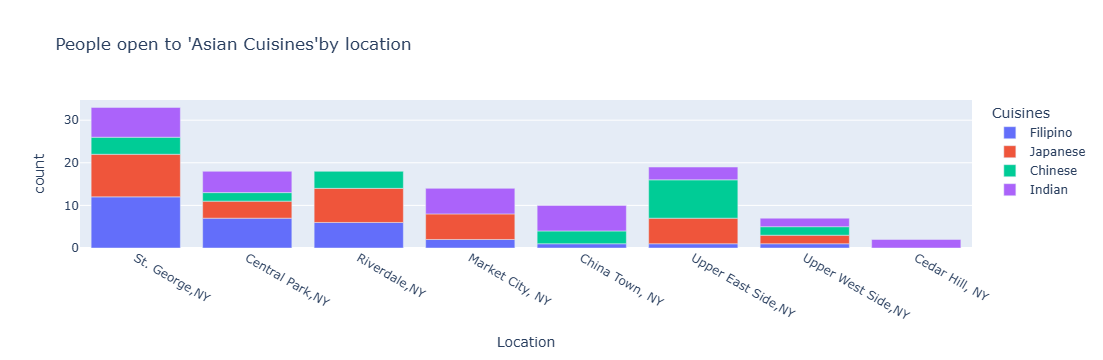

In [32]:
#displaying result using bar graphs

fig=px.bar(asian_cuisines_combination,x='Location',y='count',color='Cuisines',title="People open to 'Asian Cuisines'by location")

fig.update_layout(plot_bgcolor='sky Blue')

fig.show()

In [33]:
fig4=px.pie(asian_cuisines_combination,
            values='count',
            names='Cuisines',
            title='Most ordered asian cuisines',
           hole= 0.5)
fig4.update_layout(title_font_color='Blue')

fig4.show()

In [34]:
fig4=px.pie(asian_cuisines_combination,
            values='count',
            names='Location',
            title='Top locations for Asian cuisines')
fig4.update_layout(title_font_color='Blue')

fig4.show()

In [35]:
# Alcohol company

In [36]:
#Filtering drinkers from the data


drinkers = data[data['Alcohol'].isin(['Often','Socially'])]

drinkers.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Occupation,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited restaurant often,Age
2,3.0,122.0,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,47
4,5.0,129.0,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,27
6,7.0,111.0,"China Town, NY",Female,1977,Married,Professional,5,Indian,Often,Socially,1,4,2.5,No,47
8,9.0,107.0,"Riverdale,NY",Male,1965,Single,Student,5,Italian,Socially,Socially,3,3,3.0,No,59
9,10.0,129.0,"Central Park,NY",Male,1995,Single,Student,4,Chinese,Often,Often,5,2,3.5,Yes,29


In [37]:
#filtering drikers based on their 'Cuisines prefference','Location','Marital status','Occupation' and 'Age'...



alcohol_distribution = drinkers.groupby(['Alcohol','Cuisines','Location','Marital Status','Occupation','Age']).size().reset_index(name='count')


alcohol_combo = alcohol_distribution.sort_values(by='count',ascending=False)


alcohol_combo.head()

,Alcohol,Cuisines,Location,Marital Status,Occupation,Age,count
19,Often,Indian,"Upper East Side,NY",Married,Student,30,3
18,Often,Indian,"St. George,NY",Divorced,Professional,36,3
2,Often,Chinese,"Upper East Side,NY",Married,Professional,60,2
1,Often,Chinese,"Upper East Side,NY",Divorced,Student,46,2
5,Often,Filipino,"Market City, NY",Single,Student,57,2


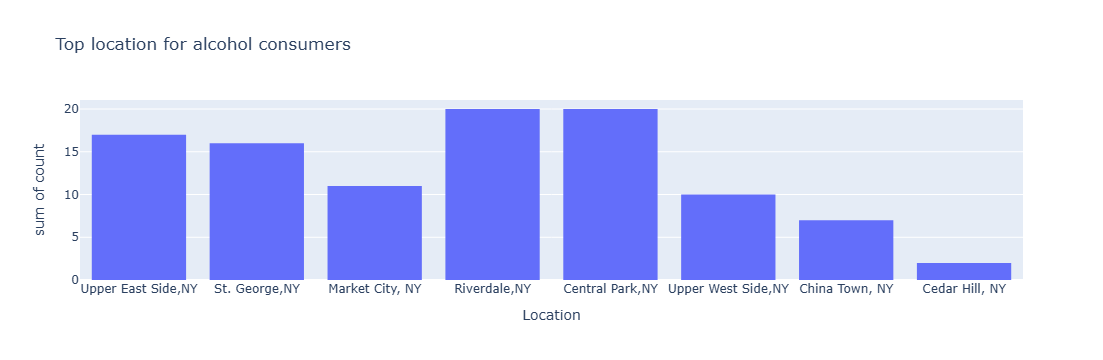

In [38]:
fig=px.histogram(alcohol_combo,
                 x='Location',
                 y='count',
                 nbins=5,
                 title='Top location for alcohol consumers')
fig.show()
    

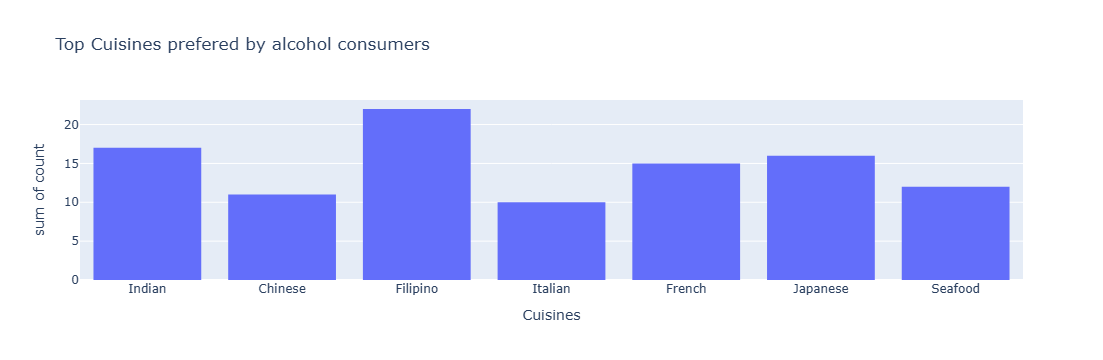

In [39]:
fig=px.histogram(alcohol_combo,
                 
                 x='Cuisines',
                 y='count',
                 nbins=10,
                 title='Top Cuisines prefered by alcohol consumers')

fig.show()

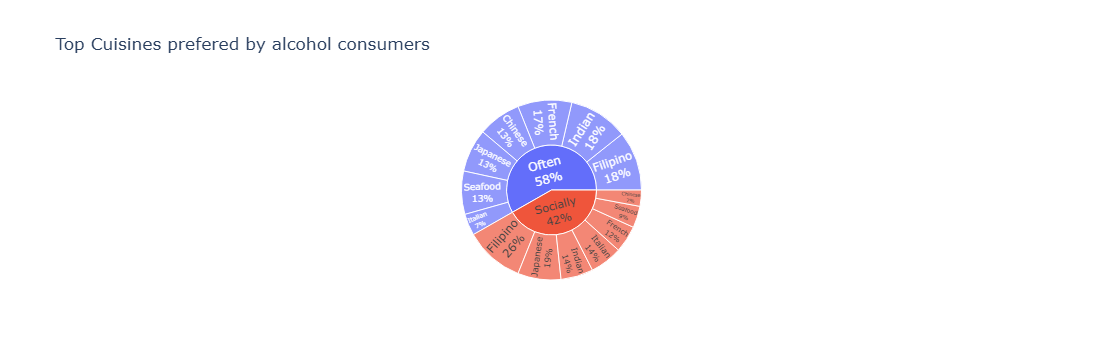

In [40]:
fig=px.sunburst(alcohol_combo,
                path=['Alcohol','Cuisines'],
                values='count',
                title="Top Cuisines prefered by alcohol consumers")
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(height=450)
fig.show()

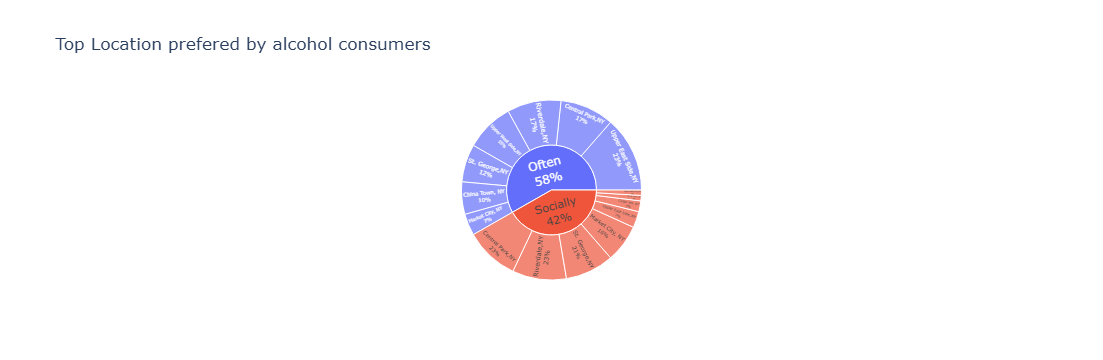

In [41]:
fig=px.sunburst(alcohol_combo,
                path=['Alcohol','Location'],
                values='count',
                title="Top Location prefered by alcohol consumers")
fig.update_traces(textinfo='label+percent parent')
fig.update_layout(height=450)
fig.show()

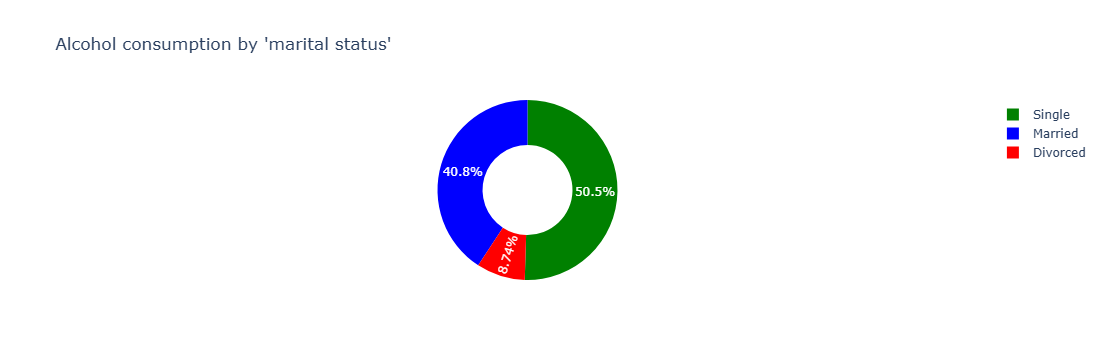

In [42]:
fig=px.pie(alcohol_combo,
           names='Marital Status',
           values='count',
           title="Alcohol consumption by 'marital status'",
           color='Marital Status',
           hole=0.5,
           color_discrete_map=
           {'Divorced':'Red',
            'Single':'Green',
            'Married':'Blue'})
           
          

fig.show()

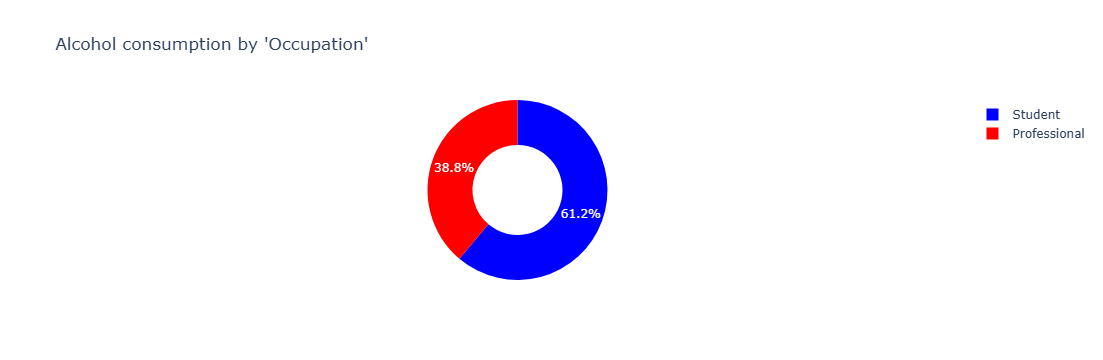

In [43]:
fig=px.pie(alcohol_combo,
           names='Occupation',
           values='count',
           title="Alcohol consumption by 'Occupation'",
           hole=0.5,
           color='Occupation',
          color_discrete_map=
          {'Student':'Blue',
           'Professional':'Red'})
        
fig.show()

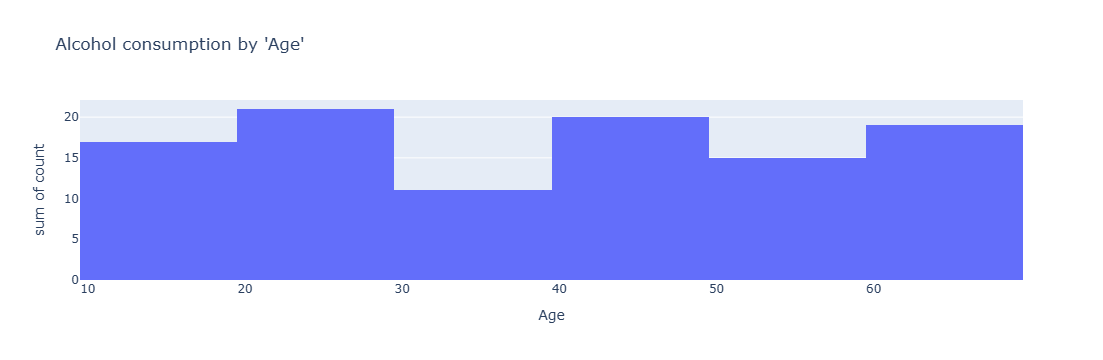

In [44]:
fig=px.histogram(alcohol_combo,
            x='Age',
            y='count',
            nbins=10,
            title="Alcohol consumption by 'Age'")
fig.show()